In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import datetime as dt
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measure', 'station']

In [5]:
# Get a list of column names and types in measure
columns = inspector.get_columns('measure')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [6]:
engine.execute('SELECT * FROM measure LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [7]:
# Get a list of column names and types in measure
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [9]:
# Reflect Database into ORM class(measure data)
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measure

In [10]:
# Reflect Database into ORM class(station data)
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

In [11]:
session = Session(engine)

In [12]:
# Total dates
session.query(func.count(Measurement.date)).all()


[(18103)]

# Precipitation Analysis 

In [13]:
#Design a query to retrieve the last 12 months of precipitation data.[2017-05-04]
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
 #Select only the `date` and `prcp` values.
precipitation = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
precipitation

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('

In [15]:
plt.show()

<IPython.core.display.Javascript object>


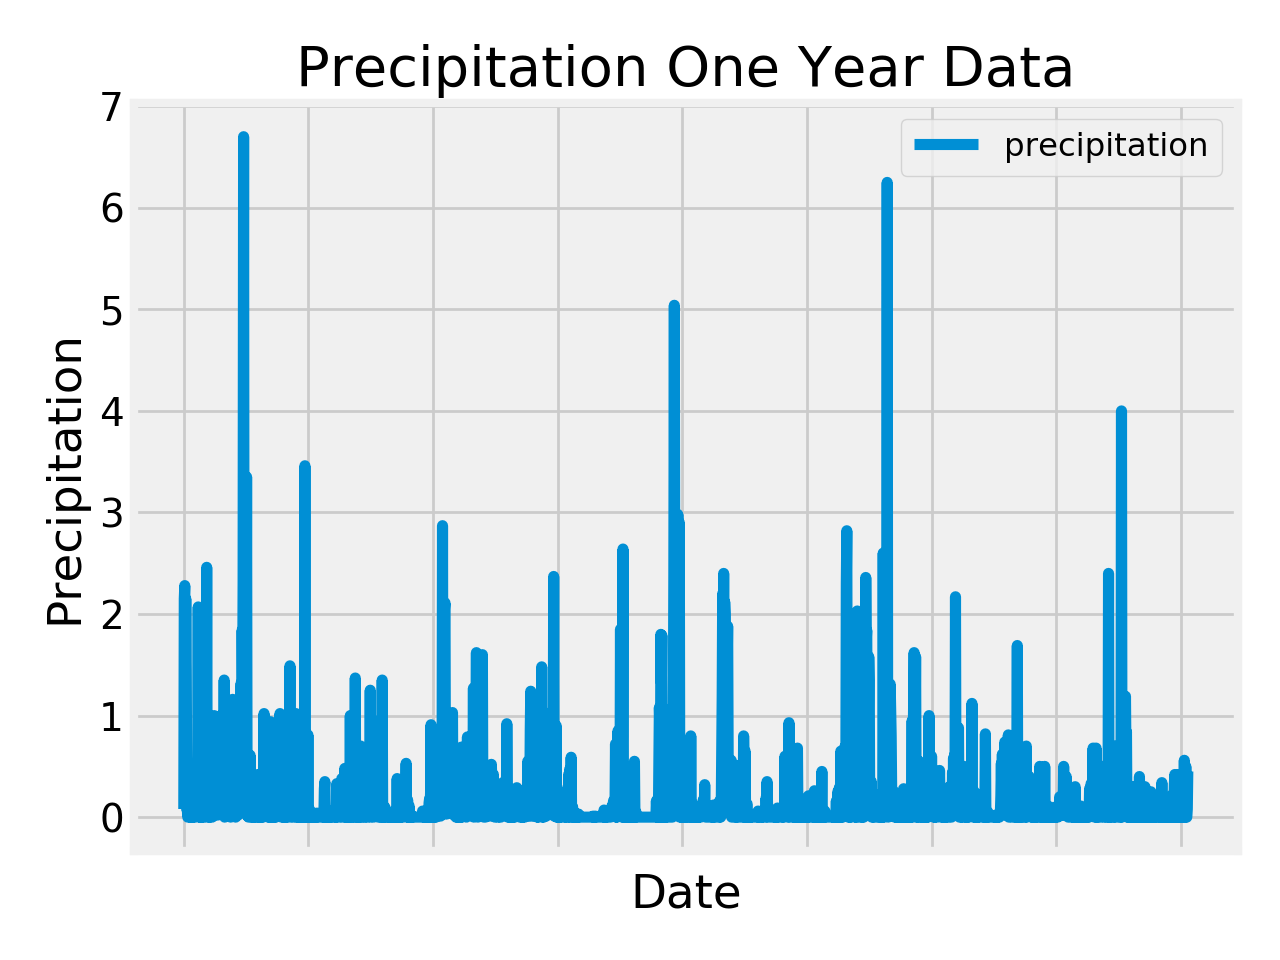

In [24]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
# Plot the Results
### BEGIN SOLUTION
#Axes limits
prcp_df = pd.DataFrame(precipitation, columns=['Date', 'precipitation'])
# prcp_df.set_index('Date', inplace=True)
prcp_df.plot(x='Date')
plt.xticks(rotation='vertical')
plt.title("Precipitation One Year Data")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(fontsize="small",loc="best")
plt.tight_layout()
plt.show()
### END SOLUTION

# Station Analysis

In [17]:
# Design a query to calculate the total number of stations.
session.query(func.count(Station.name)).all()

[(9)]

In [18]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
session.query(Measurement.station, Measurement.tobs).order_by(Measurement.tobs.desc()).first()

('USC00519397', 87)

In [19]:
#Which station has the highest number of observations?
session.query(Station.station, Station.name).filter(Station.station == 'USC00519397').first()

('USC00519397', 'WAIKIKI 717.2, HI US')

In [20]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.

high_tobs = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.date > '2016-08-23').\
            order_by(Measurement.tobs.desc()).all()
high_tobs

[('USC00519397', 87),
 ('USC00519523', 84),
 ('USC00519523', 84),
 ('USC00519523', 84),
 ('USC00519523', 84),
 ('USC00519523', 84),
 ('USC00519523', 84),
 ('USC00519397', 83),
 ('USC00514830', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519523', 83),
 ('USC00519281', 83),
 ('USC00519397', 82),
 ('USC00519397', 82),
 ('USC00519397', 82),
 ('USC00513117', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00514830', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC00519523', 82),
 ('USC0051

In [29]:
station_tobs_df = pd.DataFrame(high_tobs, columns=['Station', 'observance count'])
station_tobs_df.head()

,Station,observance count
0,USC00519397,87
1,USC00519523,84
2,USC00519523,84
3,USC00519523,84
4,USC00519523,84


In [30]:
station_tobs_filtered_df = station_tobs_df.loc[station_tobs_df["Station"] == "USC00519397", :]


In [31]:
station_tobs_filtered_df.nsmallest(2, 'observance count')

,Station,observance count
2005,USC00519397,60
2001,USC00519397,61


In [32]:
# Establish the bins 
obs_cnt_bins = [59.9,62.9, 65.90, 70.90, 73.9, 76.90, 77.90, 79.90, 83.90, 100]
group_names = ["<62", "63-65","66-70", "71-73", "74-75", "76-77", "78-79", "80-83", "85+"]

In [34]:
# Categorize the existing players using the age bins
station_tobs_df["observance count range"] = pd.cut(station_tobs_filtered_df["observance count"], obs_cnt_bins, labels=group_names)

station_tobs_bins_df = station_tobs_df.groupby(["observance count range"]).count().drop(columns=["Station"])

In [35]:
station_tobs_bins_df

,observance count
observance count range,
<62,7
63-65,13
66-70,41
71-73,51
74-75,60
76-77,38
78-79,76
80-83,71
85+,1


<IPython.core.display.Javascript object>


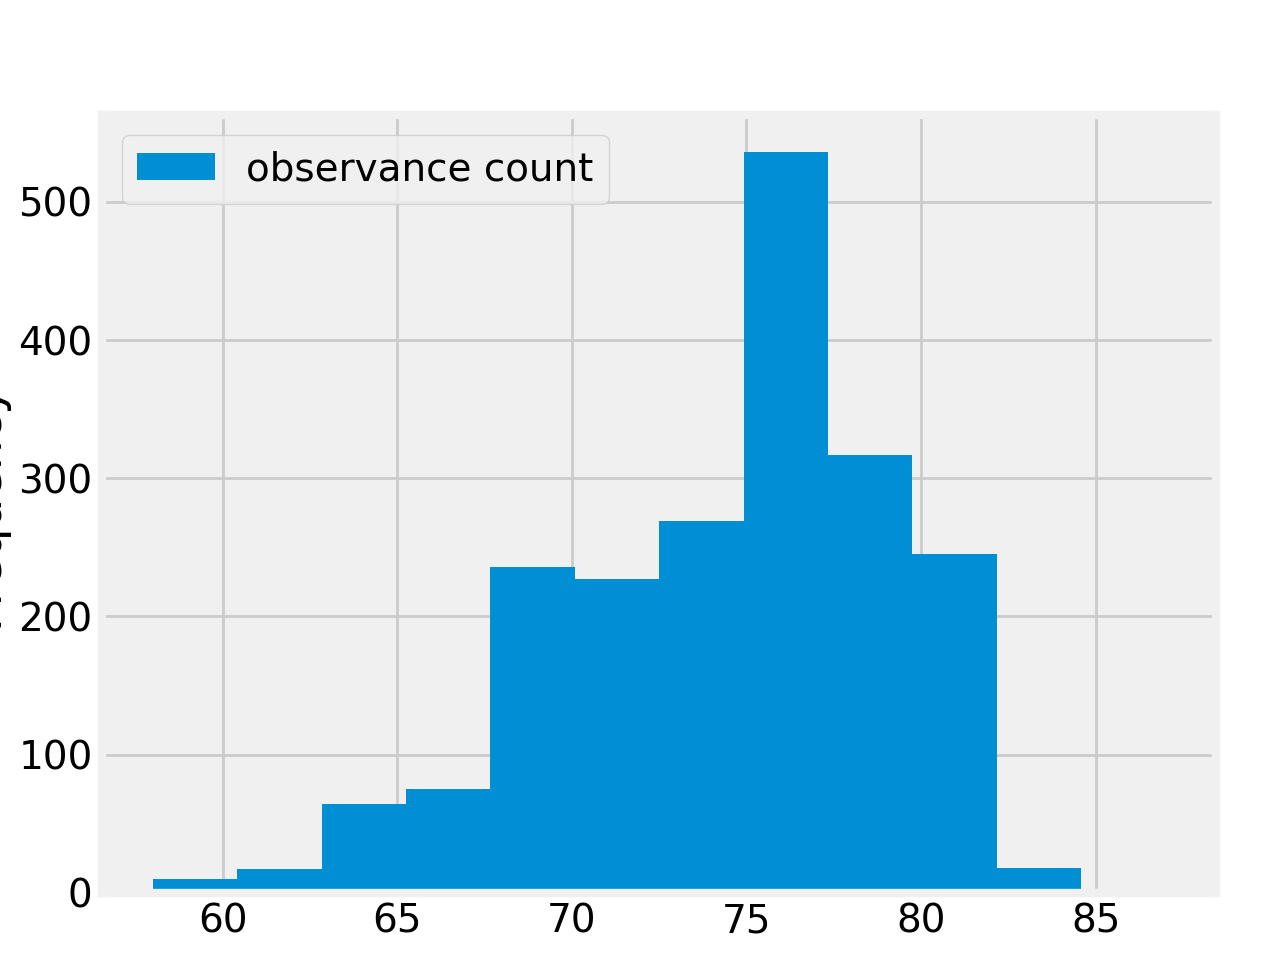

In [49]:
station_tobs_df.plot(kind='hist', bins=12)
plt.show()

# Temperature Analysis

In [ ]:
start_date = datetime.strptime('2018-07-09', '%Y-%M-%d')

In [ ]:
start_date - dt.timedelta(days=365)

In [ ]:
type(start_date)

In [40]:
#Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` 
#and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    results = session.query(Measurement.tobs).\
                                filter(Measurement.date.between(start_date, end_date)).\
                                group_by(Measurement.date).order_by(Measurement.date).all()
    min_temp = min(results)
    max_temp = max(results)
    avg_temp = np.mean(results)
    return min_temp, max_temp, avg_temp        

In [41]:
res_data = calc_temps('2017-07-09', '2017-07-20')
res_data

((72), (78), 75.41666666666667)

In [42]:
import pylab as pl

<IPython.core.display.Javascript object>


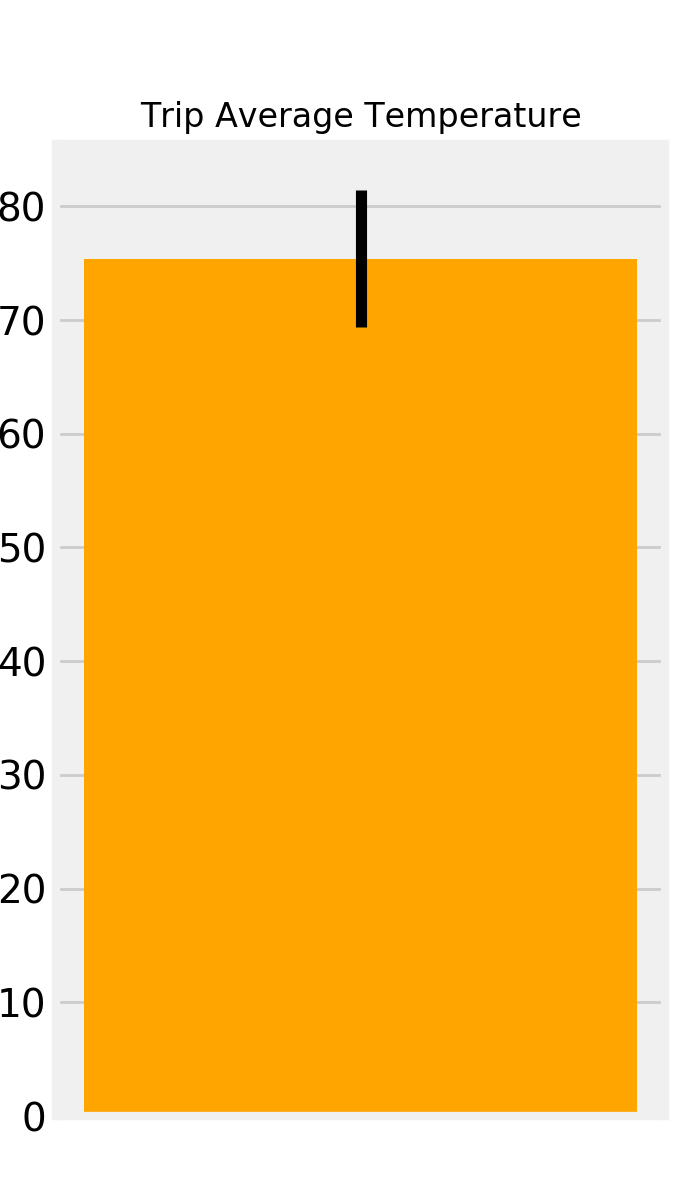

In [43]:
x = [1]
y = res_data[2]
yerr=6
plt.figure(figsize=(3.5,6))
pl.bar(x, y, color= 'orange', yerr=yerr)
plt.xticks([])
plt.title("Trip Average Temperature", fontsize=12)
plt.ylabel("Temperature(F)", fontsize= 12)
plt.show()